# 군집분석
## 01) K-means
## 02) Hierachical

## k-means

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

In [5]:
# x는 20행 2열 , y는 0과 1을 갖는다.
X,y = make_classification(n_samples=20, n_features=2, n_informative=2,
                         n_redundant=0, n_clusters_per_class=1,
                         n_classes=2, random_state=123)

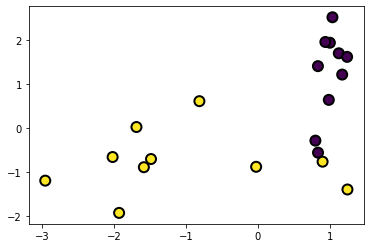

In [7]:
# 산점도로 데이터 분포 확인하기
plt.scatter(X[:,0],X[:,1],marker='o',c=y,s=100, edgecolor='k',linewidth=2)
plt.show()

In [8]:
# KMeans 클래스로 클러스터의 수를 2개로 지정, 클러스터링 모형 만든다.
from sklearn.cluster import KMeans
model=KMeans(n_clusters=2, init='random') # n_clusters = 클러스터의 수
model.fit(X)

KMeans(algorithm='auto', copy_x=True, init='random', max_iter=300, n_clusters=2,
       n_init=10, n_jobs=None, precompute_distances='auto', random_state=None,
       tol=0.0001, verbose=0)

In [9]:
# 중심점 출력 [X,y]
model.cluster_centers_

array([[ 1.01138251,  0.83200493],
       [-1.56258716, -0.69768199]])

In [10]:
# 예측한 레이블 출력
pred=model.predict(X)
pred

array([0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0])

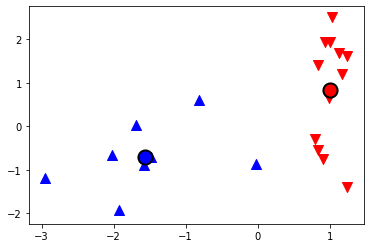

In [13]:
# 산점도로 결과보기
c0,c1 = model.cluster_centers_
plt.scatter(x=X[model.labels_ == 0,0], y=X[model.labels_ == 0,1],
           s=100, marker='v', c='r')
plt.scatter(x=X[model.labels_ == 1,0], y=X[model.labels_ == 1,1],
           s=100, marker='^', c='b')
plt.scatter(x=c0[0], y=c0[1], s=200, c='r', edgecolor='k', linewidth=2)
plt.scatter(x=c1[0], y=c1[1], s=200, c='b', edgecolor='k', linewidth=2)
plt.show()

X 데이터와 중심점 사이의 거리를 측정한 값, 클러스터링을 통해 할당된 레이블을 하나의 데이터 프레임으로 만들어 출력

In [14]:
import pandas as pd
import numpy as np

In [15]:
df=pd.DataFrame(data=np.c_[X,
                          np.linalg.norm(X-c0,axis=1),
                          np.linalg.norm(X-c1,axis=1),
                          model.labels_],
               columns=['X0','X1','d0','d1','class'])
df.head()
#linalg : 선형대수
#d0 : X0과 X1의 유클리드 거리 (X-c0 제곱 + X-c1제곱 에 루트씌운거^^)

,X0,X1,d0,d1,class
0,1.038596,2.511754,1.679969,4.131178,0.0
1,1.002714,1.935215,1.103245,3.675992,0.0
2,-1.688105,0.025994,2.817248,0.734481,1.0
3,0.901344,-0.758966,1.594771,2.464693,0.0
4,0.836531,1.404882,0.598967,3.190070,0.0


### 회차별 군집 확인하기

In [26]:
def plot_clusters(model, data):
    c0,c1=model.cluster_centers_
    plt.scatter(data[model.labels_==0,0], X[model.labels_==0,1],
               s=20,marker='v',c='r')
    plt.scatter(data[model.labels_ == 1,0], X[model.labels_ == 1,1],
           s=100, marker='^', c='b')
    plt.scatter(c0[0], c0[1], s=40, c='r', edgecolor='k', linewidth=2)
    plt.scatter(c1[0], c1[1], s=40, c='b', edgecolor='k', linewidth=2)
    # 여기서 plt.show()하지마라  - 초기화 

1-6회 학습하고 모형을 이용해 계산한 중심점과 클러스터링 된 결과 시각화

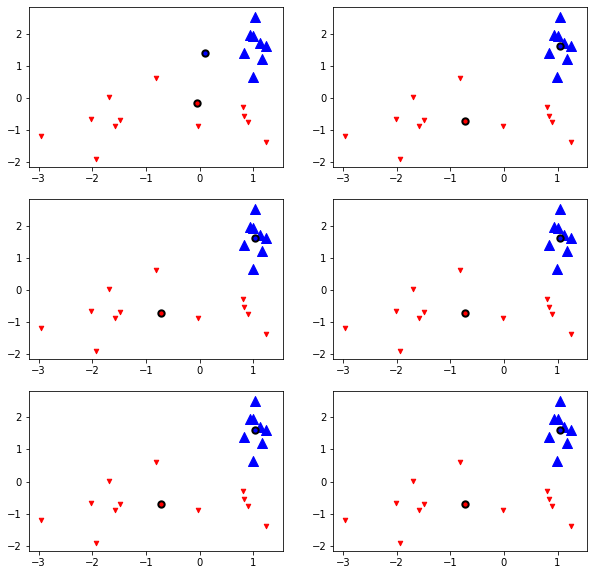

In [27]:
plt.figure(figsize=(10,10))

model1 = KMeans(n_clusters=2, init='random', n_init=1, max_iter=1, random_state=1)
model1.fit(X)
plt.subplot(3,2,1)
plot_clusters(model1,X)

model2 = KMeans(n_clusters=2, init='random', n_init=1, max_iter=2, random_state=1)
model2.fit(X)
plt.subplot(3,2,2)
plot_clusters(model2,X)

model3 = KMeans(n_clusters=2, init='random', n_init=1, max_iter=3, random_state=1)
model3.fit(X)
plt.subplot(3,2,3)
plot_clusters(model3,X)

model4 = KMeans(n_clusters=2, init='random', n_init=1, max_iter=4, random_state=1)
model4.fit(X)
plt.subplot(3,2,4)
plot_clusters(model4,X)

model5 = KMeans(n_clusters=2, init='random', n_init=1, max_iter=5, random_state=1)
model5.fit(X)
plt.subplot(3,2,5)
plot_clusters(model5,X)

model6 = KMeans(n_clusters=2, init='random', n_init=1, max_iter=6, random_state=1)
model6.fit(X)
plt.subplot(3,2,6)
plot_clusters(model6,X)

plt.show()

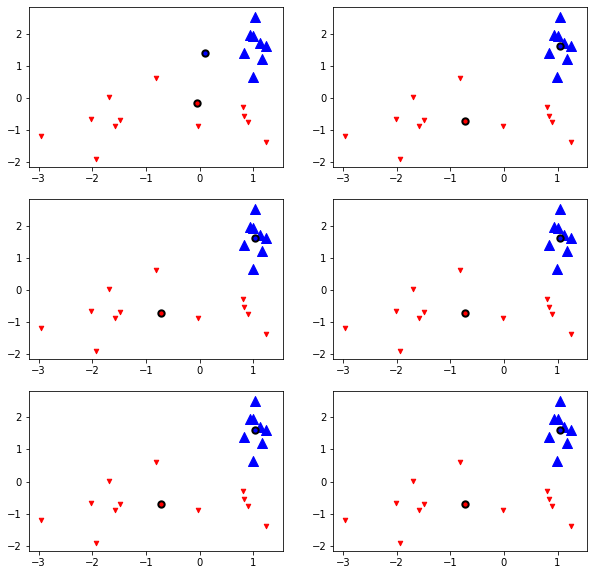

In [28]:
plt.figure(figsize=(10,10))
for i in range(6):
    model=KMeans(n_clusters=2, init='random',
                n_init=1,max_iter=(i+1), random_state=1)
    model.fit(X)
    plt.subplot(3,2,(i+1))
    plot_clusters(model,X)

## iris 데이터 군집분석

In [30]:
# 독립, 종속 변수 분리
import seaborn as sns
iris=sns.load_dataset('iris')
iris_X=iris.iloc[:,:-1]
iris_y=iris.iloc[:,-1]
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [47]:
iris.classes_

AttributeError: 'DataFrame' object has no attribute 'classes_'

In [31]:
# 클러스터링 모형 만들기
from sklearn.cluster import KMeans
iris_cluster_model = KMeans(n_clusters=3,random_state=1)
iris_cluster_model.fit(iris_X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=1, tol=0.0001, verbose=0)

In [32]:
iris_cluster_model.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [33]:
# 원본데이터랑 같게 맞춰주기 - 원본은 0이 세토사, 1이 버지컬러, 2가 버지니카가 이기 때문에 같에 맞춰줘야 범례가 같게나온다.
import numpy as np
pred=np.choose(iris_cluster_model.labels_,[1,0,2])
pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1])

In [34]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
le.fit(iris.species)
pred_str=le.inverse_transform(pred)

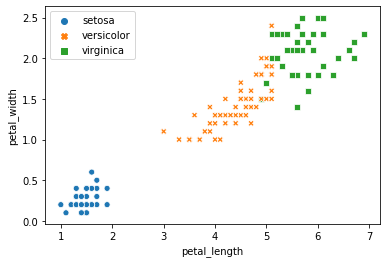

In [35]:
ax=sns.scatterplot(x='petal_length',y='petal_width',hue=pred_str, style=pred_str, data=iris)

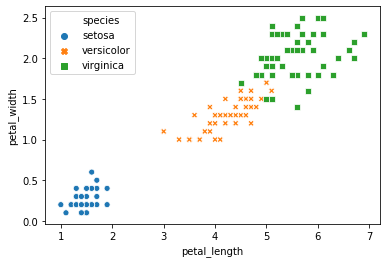

In [37]:
#  원본이랑 비교하기
ax=sns.scatterplot(x='petal_length',y='petal_width',hue='species',style='species',data=iris)

## Hierachical (계층적) 클러스터링

In [48]:
# iris데이터 셋 dendrogram으로 나타내기
import seaborn as sns
iris=sns.load_dataset('iris')

In [49]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(iris.species)
iris.species = le.transform(iris.species)

In [51]:
from scipy.cluster.hierarchy import linkage
cluster_model = linkage(iris,method='complete')

In [52]:
import matplotlib.pyplot as plt
%matplotlib inline

In [57]:
iris.index

RangeIndex(start=0, stop=150, step=1)

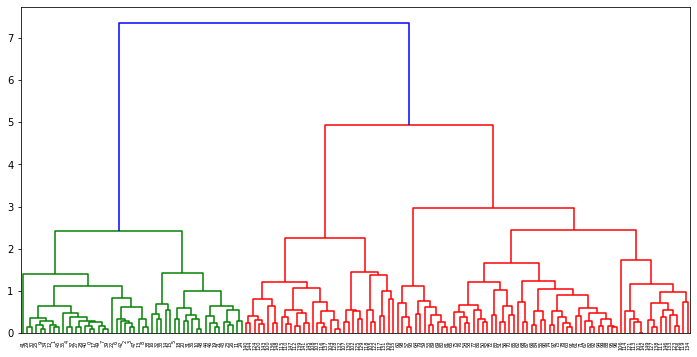

In [56]:
from scipy.cluster.hierarchy import dendrogram
plt.figure(figsize=(12,6))
dendrogram(cluster_model, labels=iris.index)
plt.show()

In [58]:
#위의  dendrogram 에 y=4인 그래프가 지나는 것과 같음
# y=4로 지정해줘서 클러스터링을 멈추게 한다.
from scipy.cluster.hierarchy import fcluster
fcluster(cluster_model,4,criterion='distance')

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 2, 2, 2, 2, 3, 2, 2, 2,
       2, 3, 2, 3, 3, 2, 2, 2, 2, 3, 2, 3, 2, 3, 2, 2, 3, 3, 2, 2, 2, 2,
       2, 3, 3, 2, 2, 2, 3, 2, 2, 2, 3, 2, 2, 2, 3, 2, 2, 3], dtype=int32)

In [59]:
# y값을 낮게하면 더 많은 수의 군집이 만들어짐
from scipy.cluster.hierarchy import fcluster
fcluster(cluster_model,2.5,criterion='distance')

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 4, 4, 4, 3, 4, 4, 4, 3, 4, 3, 3, 4, 4, 4, 3, 4,
       4, 4, 4, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 3, 3, 4, 4, 4, 4, 4, 4,
       4, 3, 4, 4, 4, 3, 4, 4, 4, 4, 3, 4, 2, 4, 2, 2, 2, 2, 4, 2, 2, 2,
       2, 4, 2, 4, 4, 2, 2, 2, 2, 4, 2, 4, 2, 4, 2, 2, 4, 4, 2, 2, 2, 2,
       2, 4, 4, 2, 2, 2, 4, 2, 2, 2, 4, 2, 2, 2, 4, 2, 2, 4], dtype=int32)

In [60]:
from scipy.cluster.hierarchy import fcluster
predict=fcluster(cluster_model,4,criterion='distance') # 예측데이터 시각화하기 위해 변수로 받았다.

In [62]:
predict

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 2, 2, 2, 2, 3, 2, 2, 2,
       2, 3, 2, 3, 3, 2, 2, 2, 2, 3, 2, 3, 2, 3, 2, 2, 3, 3, 2, 2, 2, 2,
       2, 3, 3, 2, 2, 2, 3, 2, 2, 2, 3, 2, 2, 2, 3, 2, 2, 3], dtype=int32)

In [61]:
# 할당된 클러스터 번호를 재 조정해주자.
# .choose는 데이터 순서(인덱스)를 바꿔준다.
import numpy as np
adjusted_pred = np.choose((predict-1),[0,2,1]) #predict 는 1부터 시작이니까 -1을 빼줘서 0부터 시작하게 만든다.
adjusted_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 1, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1])

In [63]:
# 교차 분류표 출력
import pandas as pd
pred_name=le.inverse_transform(adjusted_pred)
origin_name=le.inverse_transform(iris.species.values)
ct=pd.crosstab(origin_name,pred_name, rownames=['True'],colnames=['Predicted'],margins=True)
ct

Predicted,setosa,versicolor,virginica,All
True,,,,
setosa,50,0,0,50
versicolor,0,50,0,50
virginica,0,16,34,50
All,50,66,34,150


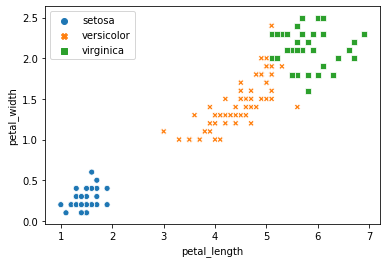

In [64]:
# 산점도 그리기
ax = sns.scatterplot(x='petal_length',y='petal_width',data=iris,hue=pred_name,style=pred_name)

## 03) 클러스터링 한계와 극복
* 크기가 다를 경우
* 밀도가 다른 경우
* 구형이 아닌 경우
    * **군의 개수를 늘리는 것으로 모두 해결가능**

### 1.크기가 다른경우

In [71]:
# 샘플데이터 만들기
import numpy as np

# 01) 평균 -10, 표준편자 2인 데이터 10개 만들기 (변수 2개)
np.random.seed(0)
group0=np.random.normal(-10,2,(10,2))
class0=np.full(group0.shape[0],0)
group0=np.c_[group0,class0]

# 02) 평균 10, 표준편차 2인 데이터 10개 (변수 2개)
group1=np.random.normal(10,2,(10,2))
class1=np.full(group1.shape[0],1)
group1=np.c_[group1,class1]

# 03) 평균 0, 표준편차 5인 데이터 100개 (변수 2개)
group2=np.random.normal(0,5,(100,2))
class2=np.full(group2.shape[0],2)
group2=np.c_[group2,class2]

# 3개의 군을 하나의 데이터로 합친다.
data = np.r_[group0,group1,group2]

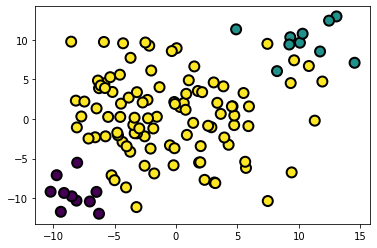

In [72]:
# 산점도 그리기
plt.scatter(x=data[:,0],y=data[:,1], marker='o', c=data[:,2].astype(np.int), s=100,
           edgecolor='k', linewidth=2)
plt.show()

In [73]:
# k-means클러스터링을 이용해 3개의 군으로 나눈다.
from sklearn.cluster import KMeans
model = KMeans(n_clusters=3,init='random')
model.fit(data[:,0:2])

KMeans(algorithm='auto', copy_x=True, init='random', max_iter=300, n_clusters=3,
       n_init=10, n_jobs=None, precompute_distances='auto', random_state=None,
       tol=0.0001, verbose=0)

In [74]:
model.cluster_centers_

array([[-3.23795138,  3.79797742],
       [ 7.93234415,  5.526175  ],
       [-2.11638402, -5.40013046]])

In [76]:
# 클러스터 예측
pred=model.predict(data[:,0:2])
pred

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0,
       2, 0, 0, 0, 2, 0, 0, 2, 2, 2, 2, 0, 0, 1, 2, 2, 2, 0, 0, 2, 1, 1,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 1, 1, 0, 0, 1, 1, 2, 0, 0, 0, 1, 0,
       0, 0, 2, 2, 0, 0, 1, 0, 2, 0, 2, 2, 2, 2, 0, 1, 0, 2, 1, 1, 2, 0,
       2, 0, 2, 2, 2, 0, 0, 0, 2, 2, 1, 1, 2, 1, 2, 2, 2, 1, 2, 2, 0, 1,
       2, 0, 0, 0, 2, 2, 0, 0, 2, 0])

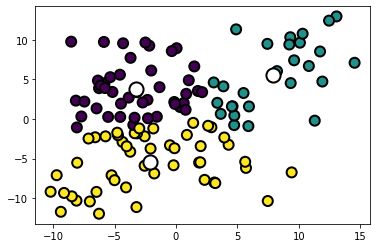

In [77]:
# 데이터 이용하여 산점도 그리고 중심점 표시하기
c=model.cluster_centers_
plt.scatter(x=data[:,0],y=data[:,1],c=pred, s=100, edgecolor='k',linewidth=2)
plt.scatter(x=c[:,0],y=c[:,1],s=200,c='w',edgecolor='k',linewidth=2) # 중심점 표시
plt.show()

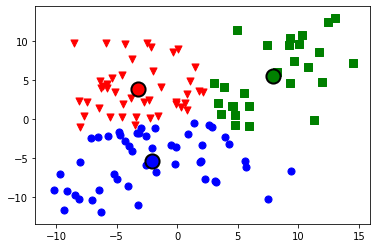

In [81]:
#모델 데이터로 산점도 그렸더니 원본과 달랐다.
c0,c1,c2=model.cluster_centers_
plt.scatter(x=data[model.labels_==0,0],y=data[model.labels_==0,1],
           s=50,marker='v',c='r')
plt.scatter(x=data[model.labels_==1,0],y=data[model.labels_==1,1],
           s=50,marker='s',c='g')
plt.scatter(x=data[model.labels_==2,0],y=data[model.labels_==2,1],
           s=50,marker='o',c='b')

plt.scatter(x=c0[0],y=c0[1],s=200,c='r',edgecolor='k',linewidth=2)
plt.scatter(x=c1[0],y=c1[1],s=200,c='g',edgecolor='k',linewidth=2)
plt.scatter(x=c2[0],y=c2[1],s=200,c='b',edgecolor='k',linewidth=2)
plt.show()

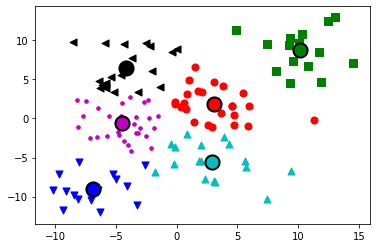

In [83]:
# 해결방법 - 클러스터 수 바꾸기
from sklearn.cluster import KMeans
model=KMeans(n_clusters=6,init='random')
model.fit(data[:,0:2]) 

centers=model.cluster_centers_
colors=['r','g','b','c','m','k']
markers=['o','s','v','^','.','<']
for i, c in enumerate(centers):
    plt.scatter(x=data[model.labels_==i,0],y=data[model.labels_==i,1],
               s=50,marker=markers[i],c=colors[i])
    plt.scatter(x=c[0],y=c[1],s=200,c=colors[i],edgecolor='k', linewidth=2)
plt.show()

### 2.밀도가 다를 경우

In [118]:
import numpy as np
np.random.seed(0)

group0=np.random.normal(13,0.5,(50,2))
class0=np.full(group0.shape[0],0)
group0=np.c_[group0,class0]

group1=np.random.normal(10,1.5,(50,2))
class1=np.full(group1.shape[0],1)
group1=np.c_[group1,class1]

group2=np.random.normal(0,5,(50,2))
class2=np.full(group2.shape[0],2)
group2=np.c_[group2,class2]

data2=np.r_[group0,group1,group2]

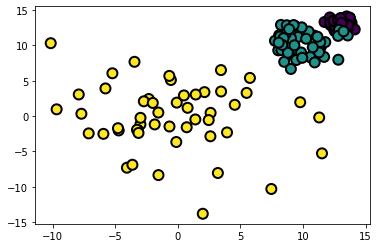

In [119]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.scatter(x=data2[:,0],y=data2[:,1],marker='o',c=data2[:,2].astype(np.int),s=100,
           edgecolor='k',linewidth=2)
plt.show()

In [120]:
from sklearn.cluster import KMeans
model=KMeans(n_clusters=3,init='random')
model.fit(data2[:,0:2])

KMeans(algorithm='auto', copy_x=True, init='random', max_iter=300, n_clusters=3,
       n_init=10, n_jobs=None, precompute_distances='auto', random_state=None,
       tol=0.0001, verbose=0)

In [121]:
pred=model.predict(data2[:,0:2])

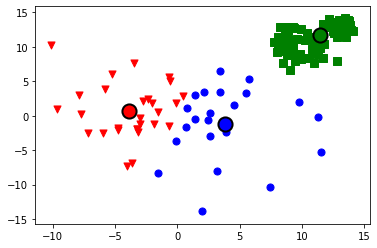

In [122]:
# 군집분석한거 시각화(산점도)
c0,c1,c2=model.cluster_centers_
plt.scatter(x=data2[model.labels_==0,0],y=data2[model.labels_==0,1],
           s=50, marker='v',c='r')
plt.scatter(x=data2[model.labels_==1,0],y=data2[model.labels_==1,1],
           s=50, marker='s',c='g')
plt.scatter(x=data2[model.labels_==2,0],y=data2[model.labels_==2,1],
           s=50, marker='o',c='b')

#중심점표시
plt.scatter(x=c0[0],y=c0[1],s=200,c='r',edgecolor='k',linewidth=2)
plt.scatter(x=c1[0],y=c1[1],s=200,c='g',edgecolor='k',linewidth=2)
plt.scatter(x=c2[0],y=c2[1],s=200,c='b',edgecolor='k',linewidth=2)

plt.show()

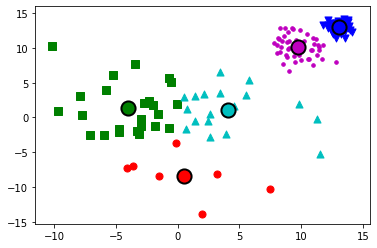

In [125]:
# 군이 원본과 다르게 나타남 - 해결방법 : 클러스터 늘리기 (5개로)
from sklearn.cluster import KMeans
model=KMeans(n_clusters=5,init='random')
model.fit(data2[:,0:2])

centers=model.cluster_centers_
colors=['r','g','b','c','m']
markers=['o','s','v','^','.']
for i, c in enumerate(centers):
    plt.scatter(x=data2[model.labels_==i,0],y=data2[model.labels_==i,1],
               s=50,marker=markers[i],c=colors[i])
    plt.scatter(x=c[0],y=c[1],s=200,c=colors[i],edgecolor='k', linewidth=2)
plt.show()

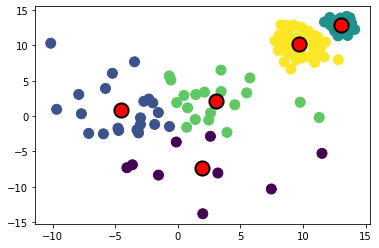

In [106]:
prd=model.predict(data2[:,0:2])
c=model.cluster_centers_
plt.scatter(x=data2[:,0],y=data2[:,1],c=prd,s=100)
plt.scatter(x=c[:,0],y=c[:,1],s=200,c='r',edgecolor='k', linewidth=2)
plt.show()

### 2.구형이 아닌경우

In [130]:
import numpy as np
np.random.seed(0)
X1=np.random.rand(200)*3
noise=np.random.normal(0,0.2,X1.shape)
Y1=np.sin(X1)+noise

X2=X1+1.5
Y2=np.cos(X2)+noise

group1=np.c_[X1,Y1,np.full(X1.shape[0],0)]
group2=np.c_[X2,Y2,np.full(X2.shape[0],1)]
data3=np.r_[group1,group2]

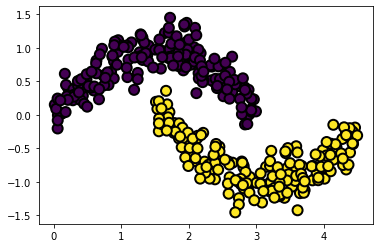

In [131]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.scatter(x=data3[:,0],y=data3[:,1],marker='o',c=data3[:,2].astype(np.int),
            s=100,edgecolor='k',linewidth=2)
plt.show()

In [132]:
from sklearn.cluster import KMeans
model=KMeans(n_clusters=2,init='random')
model.fit(data3[:,0:2])

KMeans(algorithm='auto', copy_x=True, init='random', max_iter=300, n_clusters=2,
       n_init=10, n_jobs=None, precompute_distances='auto', random_state=None,
       tol=0.0001, verbose=0)

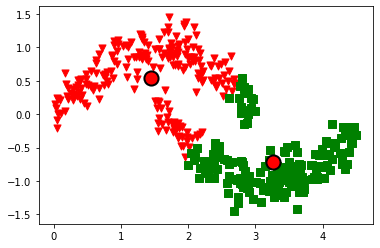

In [133]:
c0,c1=model.cluster_centers_
plt.scatter(x=data3[model.labels_==0,0],y=data3[model.labels_==0,1],
           s=50,marker='v',c='r')
plt.scatter(x=data3[model.labels_==1,0],y=data3[model.labels_==1,1],
           s=50,marker='s',c='g')

plt.scatter(x=c0[0],y=c0[1],s=200,c='r',edgecolor='k',linewidth=2)
plt.scatter(x=c1[0],y=c1[1],s=200,c='r',edgecolor='k',linewidth=2)
plt.show()

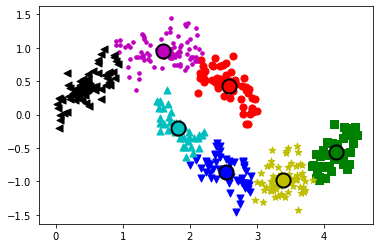

In [136]:
# 구형이 아닐때 군집이 안되는 경우  - 클러스터 (7개로 늘림)
from sklearn.cluster import KMeans
model=KMeans(n_clusters=7,init='random',random_state=2)
model.fit(data3[:,0:2])
center=model.cluster_centers_
colors=['r','g','b','c','m','y','k']
markers=['o','s','v','^','.','*','<']
for i, c in enumerate(center):
    plt.scatter(x=data3[model.labels_==i,0],y=data3[model.labels_==i,1],
               s=50,marker=markers[i],c=colors[i])
    plt.scatter(x=c[0],y=c[1],s=200,c=colors[i],edgecolor='k', linewidth=2)
plt.show()

## 자꾸 클러스터를 늘려주는데 그 기준이 뭘까?
* 실루엣계수를 알아보자.

In [137]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

In [138]:
import seaborn as sns
iris = sns.load_dataset("iris")
iris_X = iris.loc[:, ["petal_length", "petal_width"]]

In [139]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score